# read data

Install the required packages using pip
* Install using pip : `pandas`, `sklearn`, `matplotlib`, `statsmodels`
* This code was developed in Python 3.8 and any other versions are allowed.

In [1]:
import numpy as np  #for numeric computations like log, exp, sqrt
import pandas as pd #for reading & storing data, pre=processing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt #for visualization
import statsmodels.api as sm
from scipy import stats

## Read Data

Read '.csv' file in the form of DataFrame (pandas.DataFrame) through 'read_csv' method in Pandas. 

* Else, read using 'read_excel' method. 
* If there is 'Date' column, indexing is possible by specifying 'index_col' as below.

In [2]:
# use your own data
data = pd.read_csv("C:/Users/LG/OneDrive - UNIST/문서/My_Programming_Portfolio/2023/May/HeXA/Datacollection05/stockPrice.csv", index_col='Date')


It is convenient to change Date dtype from 'object' to 'datetime'.

In [3]:
# check index type
data.index

Index(['2010-10-18', '2010-10-19', '2010-10-20', '2010-10-21', '2010-10-22',
       '2010-10-25', '2010-10-26', '2010-10-27', '2010-10-28', '2010-10-29',
       ...
       '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-08', '2023-05-09',
       '2023-05-10', '2023-05-11', '2023-05-12', '2023-05-15', '2023-05-16'],
      dtype='object', name='Date', length=3100)


Convert index type using 'pd.to_datetime' method.

In [4]:
# convert index type to datetime
data.index = pd.to_datetime(data.index)

In [5]:
# Check that dtype has changed to datetime
data.index

DatetimeIndex(['2010-10-18', '2010-10-19', '2010-10-20', '2010-10-21',
               '2010-10-22', '2010-10-25', '2010-10-26', '2010-10-27',
               '2010-10-28', '2010-10-29',
               ...
               '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-08',
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-15', '2023-05-16'],
              dtype='datetime64[ns]', name='Date', length=3100, freq=None)

Filter data with are not about opening price

In [6]:
data.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace=True)

## Your Data Overview


Visualize your data using 'plot()' function.

<AxesSubplot:xlabel='Date'>

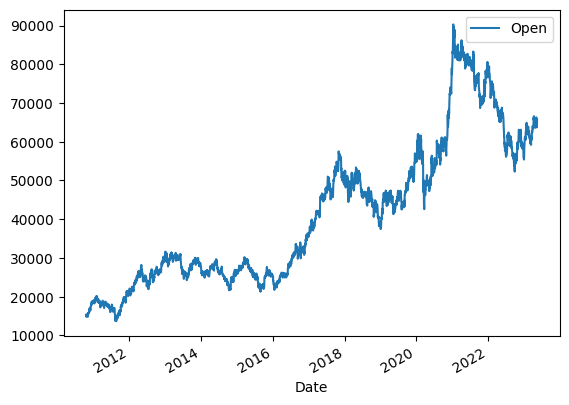

In [7]:
data.plot()

### Plot Scatter


Shift your data by one time step interval through 'shift(1)' and draw a scatter plot.

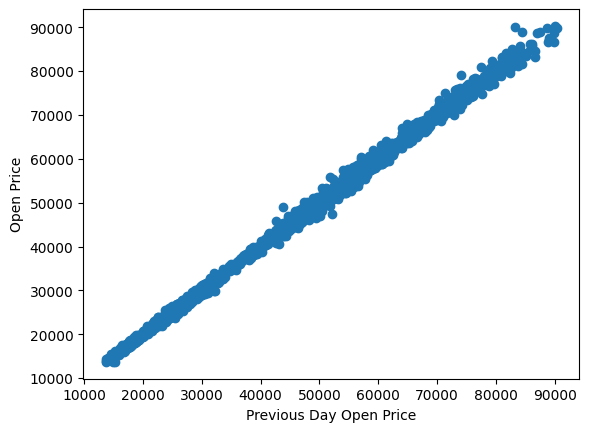

In [8]:
plt.scatter(data.shift(1)[1:], data[1:])
plt.xlabel('Previous Day Open Price')
plt.ylabel('Open Price');

### Resample Data

Follow this part if you need to resample your data.

Set a different period using the `resample` (In this example,the period is changed from daily to monthly).

In [9]:
# monthly_data = data.resample('M').first() # resample with closing price on the first trading day of the month 
# monthly_data = data.resample('M').mean() # resample with monthly average closing price
monthly_data = data.resample('M').last() # resample with closing price on the last trading day of the month 

In [10]:
monthly_data.head()

,Open
Date,
2010-10-31,15280.0
2010-11-30,16640.0
2010-12-31,18840.0
2011-01-31,20180.0
2011-02-28,18400.0


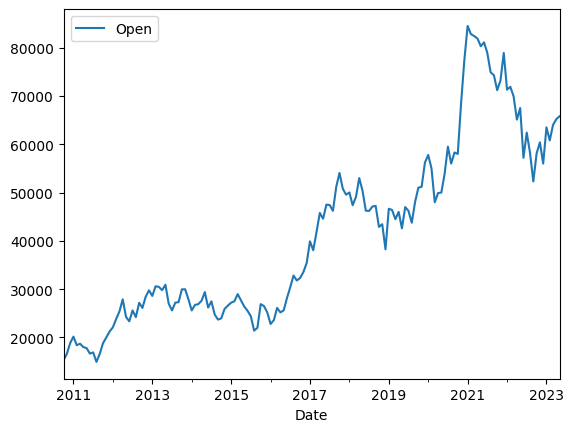

In [11]:
# visualize resampled data
monthly_data.plot();

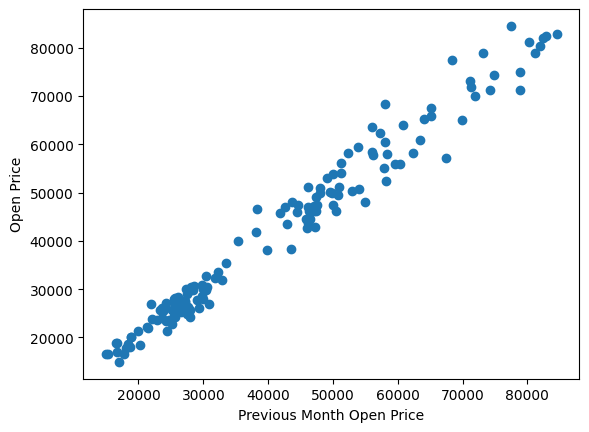

In [12]:
# Relationship with the previous month
plt.scatter(monthly_data.shift(1)[1:], monthly_data[1:])
plt.xlabel('Previous Month Open Price')
plt.ylabel('Open Price');

## Define Variables

Set x so that can represent time as the length of data.


In [13]:
x = np.arange(len(data))
x

array([   0,    1,    2, ..., 3097, 3098, 3099])

Set y as the target of your analysis.

In [14]:
# y = data.values.reshape(-1,1)
y = data.values
y

array([[15140.],
       [15000.],
       [14800.],
       ...,
       [63700.],
       [64100.],
       [65800.]])

## Linear Regression

How to run the Linear Regression

$$y=w_0+w_1 x =\begin{bmatrix}
w_0 & w_1
\end{bmatrix}   \begin{bmatrix}
1\\
x
\end{bmatrix} = \mathbf{w}\mathbf{x}$$




Find the parameter $\mathbf{w}$ based on linear regression model above.


Calculate vector $\mathbf{x}$.
Use `add_constant` method in statsmodels.

In [15]:
X = sm.add_constant(x)  # add_constant로 상수 부분을 나타내는 부분 만듦
X

array([[1.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00],
       ...,
       [1.000e+00, 3.097e+03],
       [1.000e+00, 3.098e+03],
       [1.000e+00, 3.099e+03]])



Now, $y$ and $\mathbf{x}$ are ready. Find $\mathbf{w}$ to minimize the residual.



Use 'OLS.fit()' in statsmodels to fit linear model.
Use `summary()` method to analyze the result of model(p-value, R-squared, etc).



*   Fitting means to optimize $\mathbf{w}$.
*   Ordinary Least Square (OLS) can be utilized to minimize Mean Squared Error (MSE).



### Fitting Linear Regression

In [16]:
lin_reg = sm.OLS(y, X).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                 1.340e+04
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        22:03:39   Log-Likelihood:                -32302.
No. Observations:                3100   AIC:                         6.461e+04
Df Residuals:                    3098   BIC:                         6.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.201e+04    291.372     41.234      0.0



Calculate the parameter $\mathbf{w}$ using `params` method.

In [17]:
lin_reg.params # w_0, w_1

array([12014.51335157,    18.84986595])

In [18]:
intercept=lin_reg.params[0]
coef = lin_reg.params[1]

In [19]:
intercept

12014.513351572336

In [20]:
coef

18.849865952622757

Finally, $$y=-21.6986+0.0070 x$$ is obtained.

### Plot Linear Regression Results


Use the `predict` method to calculate the model prediction for input x

* Plot with your data

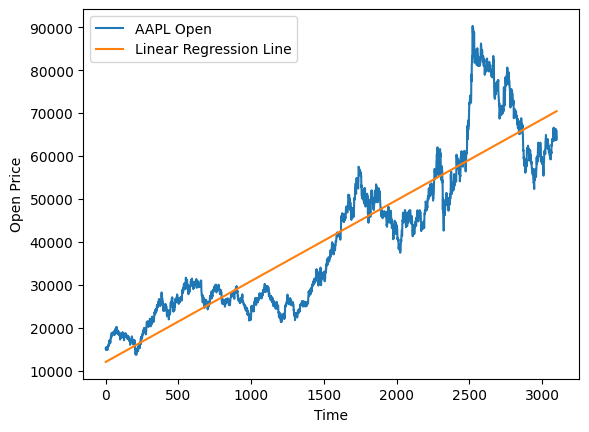

In [21]:
plt.plot(x,y,label='AAPL Open') # original data

y_hat = lin_reg.predict(X)
plt.plot(x,y_hat,label='Linear Regression Line') # regression line

plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend();

### Linear Regression MSE


Calculate Mean Squared Error (MSE) of model using `mse_resid` method.

In [22]:
# MSE
lin_reg.mse_resid

65827648.181703486

## Linear Regression does not work well
## So try other way

In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

In [24]:
adf_test(monthly_data)

ADF Statistics: -1.017425
p-value: 0.746856
num of lags: 5.000000
num of observations: 146.000000
Critical values:
	1%: -3.476
	5%: -2.882
	10%: -2.577


As p-value is greater than 0.05

Data is not stationaly

So, differentiate data

In [25]:
#1st diffrence
diff_df = monthly_data['Open'].diff(periods=1).iloc[1:]

print('Raw data')
print(monthly_data)

print('After 1st difference')
print(diff_df)

Raw data
               Open
Date               
2010-10-31  15280.0
2010-11-30  16640.0
2010-12-31  18840.0
2011-01-31  20180.0
2011-02-28  18400.0
...             ...
2023-01-31  63500.0
2023-02-28  60800.0
2023-03-31  64000.0
2023-04-30  65200.0
2023-05-31  65800.0

[152 rows x 1 columns]
After 1st difference
Date
2010-11-30    1360.0
2010-12-31    2200.0
2011-01-31    1340.0
2011-02-28   -1780.0
2011-03-31     320.0
               ...  
2023-01-31    7500.0
2023-02-28   -2700.0
2023-03-31    3200.0
2023-04-30    1200.0
2023-05-31     600.0
Freq: M, Name: Open, Length: 151, dtype: float64


<AxesSubplot:xlabel='Date'>

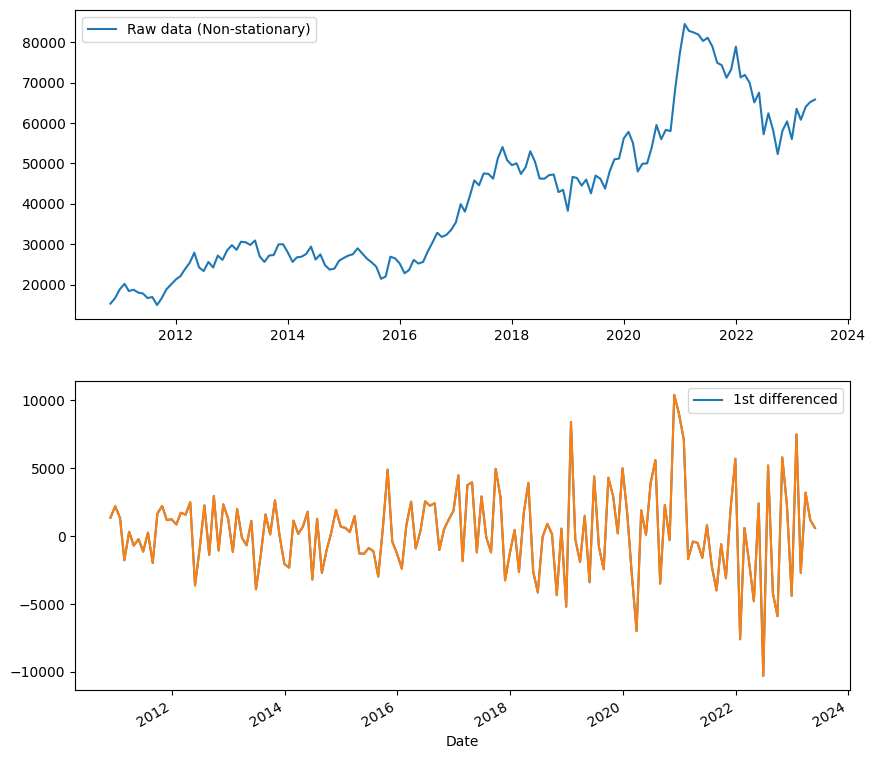

In [26]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(211)
ax1.plot(monthly_data['Open'])
ax1.legend(['Raw data (Non-stationary)'])

ax2 =plt.subplot(212)
ax2.plot(diff_df)
ax2.legend(['1st differenced'])

diff_df.plot()

In [27]:
adf_test(diff_df)

ADF Statistics: -4.763594
p-value: 0.000064
num of lags: 4.000000
num of observations: 146.000000
Critical values:
	1%: -3.476
	5%: -2.882
	10%: -2.577


자동으로 미분 횟수를 구하기

In [28]:
from pmdarima.arima import ndiffs
import pmdarima as pm

In [29]:
n_diffs = ndiffs(monthly_data, alpha=0.05, test='adf', max_d=6      )
print(f"추정된 차수 d = {n_diffs}") # 결과

추정된 차수 d = 1


In [30]:
model = pm.auto_arima(monthly_data, d=n_diffs,
                      start_p=0, start_q=0, max_order=13, 
                      test='adf', 
                      seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2859.123, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2860.260, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2860.363, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2858.889, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2862.250, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.211 seconds


In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1428.445
Date:                Thu, 18 May 2023   AIC                           2858.889
Time:                        22:03:43   BIC                           2861.907
Sample:                    10-31-2010   HQIC                          2860.115
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.581e+06   8.53e+05     11.228      0.000    7.91e+06    1.13e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):                10.60
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               6.20   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Residual은 correlation이 없어야함

이를 위해서 확인하는 통계 분포 검정

Ljung-Box prob(Q)>0.05 -> residual is white noise

귀무가설이 잔차들이 white noise일 것이다


Jarque-Bera prob(JB)>0.05 -> residual is stationary

귀무가설이 잔차는 정적 분포일 것이다 - 확률변수 간의 확률 분포가 시간에 상관없이 일정한 확률 과정

### 실제로 모델을 구축하고 예측하는 테스트까지 해보기

데이터 분리 - test, train

In [32]:
train_df, test_df = monthly_data[:int(len(monthly_data)*0.9)], monthly_data[int(len(monthly_data)*0.9):]

In [33]:
n_diffs = ndiffs(train_df, alpha=0.05, test='adf', max_d=6      )
print(f"추정된 차수 d = {n_diffs}") # 결과

추정된 차수 d = 1


In [34]:
auto = pm.auto_arima(train_df, d=n_diffs,
                      start_p=0, start_q=0, max_order=13, 
                      test='adf', 
                      seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2532.990, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2534.782, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2534.827, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2533.867, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2533.621, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.163 seconds


In [35]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  136
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1264.495
Date:                Thu, 18 May 2023   AIC                           2532.990
Time:                        22:03:44   BIC                           2538.800
Sample:                    10-31-2010   HQIC                          2535.351
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    414.9630    250.855      1.654      0.098     -76.704     906.630
sigma2      8.003e+06    7.7e+05     10.392      0.000    6.49e+06    9.51e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                15.40
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               5.32   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
test = test_df["Open"]

In [37]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = auto  # seeded from the model we've already fit

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)

print(f"Mean squared error: {mean_squared_error(test, forecasts)}")
print(f"SMAPE: {smape(test, forecasts)}")
# Mean squared error: 0.34238951346274243
# SMAPE: 0.9825490519101439

Mean squared error: 22615190.914307598
SMAPE: 6.440670995877625


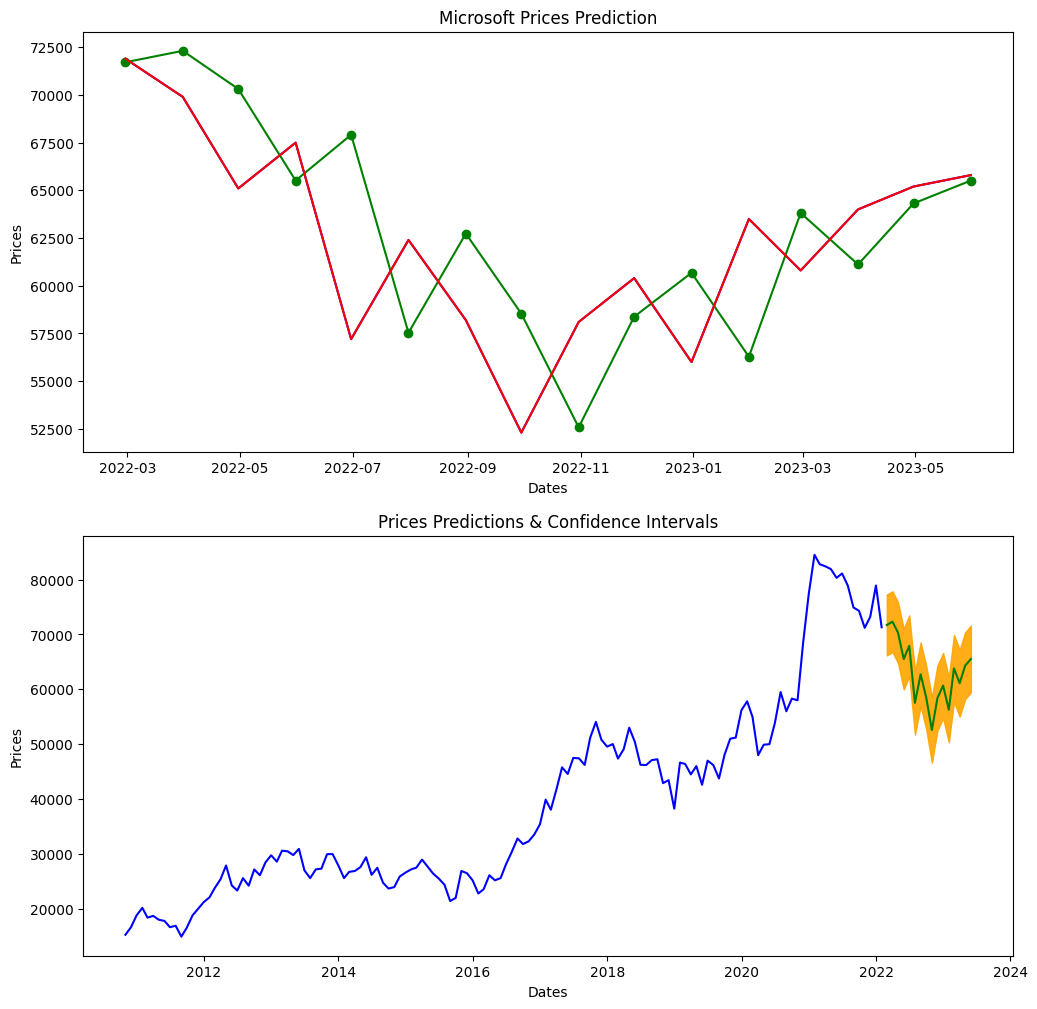

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# --------------------- Actual vs. Predicted --------------------------
axes[0].plot(test, color='blue', label='Training Data')
axes[0].plot(test_df.index, forecasts, color='green', marker='o',
             label='Predicted Price')

axes[0].plot(test_df.index, test, color='red', label='Actual Price')
axes[0].set_title('Microsoft Prices Prediction')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('Prices')


# ------------------ Predicted with confidence intervals ----------------
axes[1].plot(train_df, color='blue', label='Training Data')
axes[1].plot(test_df.index, forecasts, color='green',
             label='Predicted Price')

axes[1].set_title('Prices Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')

conf_int = np.asarray(confidence_intervals)
axes[1].fill_between(test_df.index,
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")

https://alkaline-ml.com/pmdarima/usecases/stocks.html